In [2]:
import numpy as np
import geopandas as gp
#import geoplot
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

geojs = gp.read_file('Downloads/data/nyc-neighborhoods.geo.json')

df = pd.read_csv('Downloads/data/listings.csv')
df = df[['latitude','longitude','price']]


In [3]:
df['price'].describe() 

count    51097.000000
mean       160.240503
std        373.633875
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [4]:
q1 = df['price'].quantile(.25)
q3 = df['price'].quantile(.75)
iqr = q3 - q1

lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

d = df[df.price > lower_bound]
df = d[d.price < upper_bound]

/Users/luyuankong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/luyuankong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


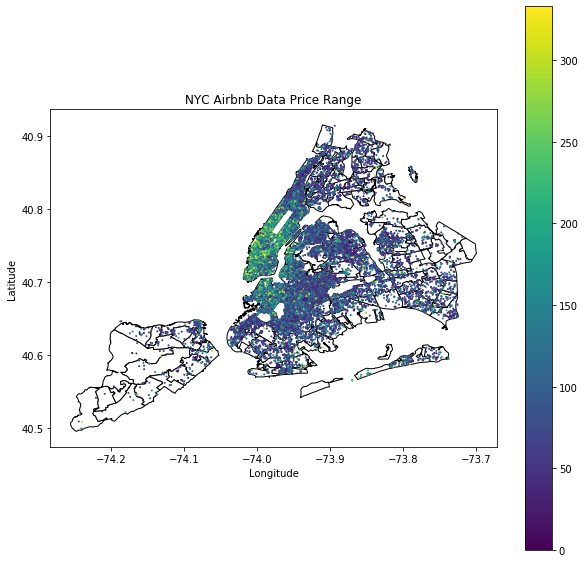

In [7]:

df['coords'] = list(zip(df.longitude, df.latitude))
df['coords'] = df['coords'].apply(Point)

gdf = gp.GeoDataFrame(df, geometry='coords')

base = geojs.plot(color='white', edgecolor='black', linewidth = 1, figsize=(10,10))

gdf.plot(ax=base, marker='o', column='price', markersize=1, legend=True)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NYC Airbnb Data Price Range')

plt.savefig('heatmap.png')

plt.show()